# 1 引言
感知机是一种简单且易于实现的二分类判别模型，主要思想是通过误分类驱动的损失函数结合梯度下降发求解一个超平面将线性可分的数据集划分为两个不同的类别（+1类和-1类）。  
在神经网络、支持向量机等算法盛行的当下，感知机模型应用得并不多，但必须承认，感知机却是神经网络和支持向量机的基础，所以还是很有必要学习一下的，本文接下来的内容将从感知机数学描述、损失函数、两种不同学习形式等方面详细介绍感知机，最后使用Python实现感知机两种学习形式。

# 2 感知机模型及损失函数
## 2.1 数学描述
对于给定训练样本数据集$D = \{ ({x_i},{y_i})\} _{i = 1}^m$,${x_i} \in X \subseteq {R^n}$表示训练样本的特征向量,${y_i} \in Y = \{  + 1, - 1\} $表示样本类别。$x$与$y$之间的如下函数关系：
$$y = f(x) = sign(w \cdot x + b)$$
称为感知机。其中，$w \in {R^n}$称为感知机的权值系数或者权值向量，$b \in R$称为偏置，$sign$是符号函数，有：
$$sign = \left\{ {_{ - 1,    x < 0}^{ + 1,    x \geqslant 0}} \right.$$
从定义上可以看出，感知机最终目标就是求解出$w$和$b$。我们可以从几何上对感知机进行理解，如果以$w$为法向量，以$b$为截距，可以确定一超平面：
$$w \cdot x + b = 0$$
通过这一超平面，可以顺利将对数据集进行划分。以二维数据为例，如下图所示,当样本点$x$刚好落在超平面上时，有$w \cdot x + b = 0$，当$x$落在超平面下方时，有$w \cdot x + b < 0$，通过$sign$函数后输出为$-1$,也就是标记为$-1$类；当$x$落在超平面上方时，有$w \cdot x + b > 0$，通过$sign$函数后输出为$+1$,也就是标记为$+1$类。注意，这样的超平面一般不唯一，也就是说感知机最终解可以有很多个，受参数初始值、训练样本输入顺序等因素的影响，每次训练时所获得的超平面都可能不一样。
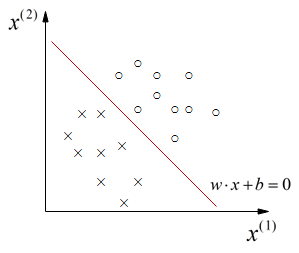

## 2.2 损失函数
为了求解参数$w$和$b$，确定最终的分割超平面，我们需要定义一个目标函数或者说损失函数，通过最小化损失函数来达到目的。在感知机模型中，以误分类的样本对象与分割超平面间的距离之和最为损失函数。我们高中时学过，对于点$({x_0},{y_0})$，到平面$A \cdot x + B \cdot y + C = 0$的距离为：
$$dist = \frac{{|A \cdot {x_0} + B \cdot {y_0} + C|}}{{\sqrt {{A^2} + {B^2}} }} $$
将这一公式扩展到超平面中，对于超平面$w \cdot x + b = 0$，误分类点$x_i$到超平面的距离为：
$$dist = \frac{{|w \cdot xi + b|}}{{\left\| w \right\|}} $$
式中，${\left\| w \right\|}$是$w$的$L_2$范数，等同于上面的${\sqrt {{A^2} + {B^2}} }$。
为了方便计算，我们需要将分子中的绝对值去掉，怎么去掉呢？因为$({x_i},{y_i})$是误分类样本点，$y_i$与${w \cdot xi + b}$一定是异号的，所以：
$$ - {y_i} \cdot (w \cdot x_i + b) > 0 $$
且因为$|{y_i}| = 1$，所以：
$$ - {y_i} \cdot (w \cdot x_i + b) = |w \cdot x_i + b| $$
于是，$({x_i},{y_i})$到超平面的距离可以表示为：
$$\frac{{ - {y_i} \cdot (w \cdot x_i + b)}}{{\left\| w \right\|}} $$
假设$M$是所有误分类点组成的集合，那么所有误分类点到超平面距离总和为：
$$\sum\limits_{{x_i} \in M} {\frac{{ - {y_i} \cdot (w \cdot {x_i} + b)}}{{\left\| w \right\|}}}  \tag{1}$$
这就是我们需要的损失函数的雏形了，之所以说是雏形，是因为我们还可以通过令$\left\| w \right\|{\text{ = }}1$对上式进一步化简，于是有：
$$L(w,b) = \sum\limits_{{x_i} \in M} { - {y_i} \cdot (w \cdot {x_i} + b)} \tag{2}$$
$L(w,b)$就是我们最终需要的损失函数。
为什么可以直接令$\left\| w \right\|{\text{ = }}1$来化简式（1）呢？

我们可以在权值向量$w$中添加一个$w_0$元素，在特征向量$x_i$中添加一个第0纬度${x^{(0)}} = 1$，令偏置$b = {w_0} \cdot {x^{(0)}}$，这样，我们就把偏置$b$也放进了权值向量$w$中，那式（1）就变为：
$$\sum\limits_{{x_i} \in M} {\frac{{ - {y_i} \cdot w \cdot {x_i}}}{{\left\| w \right\|}}} $$
此时，分子和分母都含有$w$,当分子的$w$扩大$N$倍时，分母的$L_2$范数也会扩大N倍。也就是说，分子和分母有固定的倍数关系。那么我们可以固定分子或者分母为1，然后求分母的倒数或者分子自己的最小化作为损失函数，这样可以简化我们的损失函数。在感知机模型中，采用的是保留分子的策略。  
另一种解释，当把偏置$b$包含进$w$后，超平面表达式也简化成$w \cdot {x_i} = 0$，无论是把$w$扩大多少倍、缩小多少倍，都对超平面没有影响（就像$x + y - 1 = 0$与$2x + 2y - 2 = 0$始终表示同一条直线），那么我们总能找到一个倍数，将$w$缩小到满足${\left\| w \right\|}=1$，但并不影响我们获得最终的超平面，但是令${\left\| w \right\|}=1$后却有助于我们化简和求解。

# 3 优化方法
上一节中，我们介绍了感知机模型损失函数$L(w,b)$的由来，接下来就要说说怎么通过优化损失函数来获得最终的超平面。在感知机模型中，有两种优化方式：原始形式和对偶形式。
## 3.1 原始形式
原始形式采用的是梯度下降法进行求解，如果对梯度下降法不了解，可以参看前面写过的一篇[博客](https://www.cnblogs.com/chenhuabin/p/11166726.html)。这里需要注意的是，在上一小节中说过，感知机是基于误分类驱动的一种模型，所以不能使用整个数据集进行梯度下降优化，只能对误分类样本集合$M$采用随机梯度下降法或者小批量梯度下降法进行优化。
对损失函数$L(w,b)$求偏导：
$$\frac{{\partial L(w,b)}}{{\partial w}} =  - \sum\limits_{{x_i} \in M} {{y_i} \cdot {x_i}} $$
$$\frac{{\partial L(w,b)}}{{\partial b}} =  - \sum\limits_{{x_i} \in M} {{y_i}} $$
那么，$w$的梯度下降迭代公式为：
$$w = w + \alpha  \cdot \sum\limits_{{x_i} \in M} {{y_i} \cdot {x_i}} $$
偏置$b$的梯度下降迭代公式为：
$$b = b + \alpha  \cdot \sum\limits_{{x_i} \in M} {{y_i}} $$
式中，$\alpha $是学习率。
感知机模型中，一般采用随机梯度下降法进行优化，每次使用一个误分类样本点进行梯度更新。假设$(x_i,y_i)$是$M$中的一个误分类点，进行梯度更新：
$$w = w + \alpha  \cdot {y_i}{x_i} \tag{3}$$
$$b = b + \alpha  \cdot {y_i} \tag{4}$$
总结一下原始形式优化步骤。
输入：训练样本数据集$D = \{ ({x_i},{y_i})\} _{i = 1}^m$,${x_i} \in X \subseteq {R^n}$,${y_i} \in Y = \{  + 1, - 1\} $，学习率% $\alpha  \in (0,1)$  
输出：$w$,$b$；感知机模型$f(x) = sign(w \cdot x + b) $  
（1）初始化$w_0$，$b_0$；  
（2）在$D$中选取任意点$(x_i,y_i)$；  
（3）通过${y_i} \cdot (w \cdot {x_i} + b)$的值判断是否是误分类点，如果是，使用式（3）、（4）更新参数；  
（4）回到步骤（2）直到准确率满足条件。
## 3.2 对偶形式
对偶形式时原始形式在执行效率上的优化。通过3.1小节中，我们知道，每当一个样本点$x_i$被错误分类一次时，都会使用式（3）（4）更新一次参数，那么，如果样本点$x_i$在迭代过程中被错误分类多次（假设$n_i$次），那么就回有$n_i$次参与到参数更新中，我们假设参数$w$和$b$的初始值都为0向量，那么，最终获得的参数$w$和$b$为：
$$w = \sum\limits_{i = 1}^N {{\beta _i} {y_i}{x_i}}  \tag{5}$$
$$b = \sum\limits_{i = 1}^N {{\beta _i} {y_i}}  \tag{6}$$
这是在对偶形式中的参数更新方式，式中，${\beta _i} ={n_i}\alpha$。另外，在原始形式中，我们使用${y_i}(w \cdot {x_i} + b) \leqslant 0$来判断样本点$x_i$是否被错误分类，将式（5）（6）代入这一判别式中，得：
$${y_i}(\sum\limits_{i = 1}^N {{\beta _i} {y_i}{x_i}}  \cdot {x_j} + \sum\limits_{i = 1}^N {{\beta _i} {y_i}}) \leqslant 0 \tag{7}$$
在对偶形式中，采用式（7）判断样本点是否正确分类，观察后可以发现，式（7）中有两个样本点$x_i$和$x_j$内积计算，这个内积计算的结果在下面的迭代过程中需要多次被重复使用，如果我们事先用矩阵运算计算出所有的样本之间的内积，那么在算法迭代过程中， 仅仅一次的矩阵内积运算比原始形式中每遍历一个样本点都要计算$w$与$x_i$的内积要省时得多，这也是对偶形式的感知机模型比原始形式优的原因。  
在感知机模型中，样本的内积矩阵称为Gram矩阵，它是一个对称矩阵，记为$G = {[{x_i},{x_j}]_{m \times m}}$。
总结一下对偶形式的步骤。  
输入：训练样本数据集$D = \{ ({x_i},{y_i})\} _{i = 1}^m$,${x_i} \in X \subseteq {R^n}$,${y_i} \in Y = \{  + 1, - 1\} $，学习率% $\alpha  \in (0,1)$  
输出：$w$,$b$；感知机模型$f(x) = sign(w \cdot x + b) $  
（1）初始化所有$n_i$值为0；  
（2）计算Gram矩阵；  
（3）在$D$中选取任意点$(x_i,y_i)$；  
（4）如果${y_i}(\sum\limits_{i = 1}^N {{\beta _i} {y_i}{x_i}}  \cdot {x_j} + \sum\limits_{i = 1}^N {{\beta _i} {y_i}}) \leqslant 0 $，令${\beta _i} = {\beta _i} + \alpha $；  
（5）检查是否还有误分类样本点，如果有，回到步骤（2）；如果没有，（5）（6）计算$w$、$b$最终值。

# 4 算法实现

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import copy

In [15]:
# 先来制造一批数据
a = np.random.normal(20,5,300)
b = np.random.normal(15,5,300)
cluster1 = np.array([[x, y, -1] for x, y in zip(a,b)])

In [16]:
a = np.random.normal(45,5,300)
b = np.random.normal(40,5,300)
cluster2 = np.array([[x, y, 1] for x, y in zip(a,b)])

In [17]:
dataset = np.append(cluster1,cluster2, axis=0)

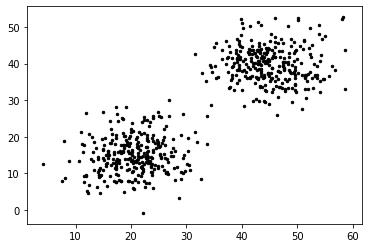

In [95]:
for i in dataset:
    plt.scatter(i[0], i[1],c='black',s=6)
plt.show()

In [93]:
len(dataset)

600

In [175]:
class Perception(object):

    def __init__(self):
        """
        感知机模型
        """
        self.w = 0
        self.b = 0
    
    def fit_raw_mod(self, train_data, lr=1, max_epoch=None, min_error_rate=0):
        """
        原始模式的感知机训练方法，当达到最大迭代次数或错误率降到最小范围退出
        train_data：训练数据集
        lr：学习率
        max_epoch：最大迭代次数
        min_error_rate：最小错误率
        """
        self.w = np.zeros(train_data.shape[1]-1)  # 根据训练集维度初始化权重系数
        epoch = 1  # 记录迭代次数
        while True:
            error_count = 0  # 记录错误分类样本数
            for sample in train_data:
                xi = sample[0:-1]
                yi = sample[-1]
                distance = yi * (self.w @ xi + self.b)  # yi*(w⋅xi*+b)
                if distance <= 0: # 对于判断错误的样本点
                    self.w += lr * sample[-1] * sample[0:-1]
                    self.b += lr * sample[-1]
                    error_count += 1
            # 每完成一次迭代之后，验证一次准确率，准确率达标则退出
            current_error_rate = float(error_count) / train_data.shape[0]
            # print('epoch {0}，current_error_rate: {1}'.format(epoch+1, current_error_rate))
            # print('w:{0}, b:{1}'.format(self.w, self.b))
            # self.show_graph(train_data)  # 每一次迭代都展示一次图像
            if current_error_rate <= min_error_rate:
                break
            if isinstance(max_epoch, int) and epoch >= maxepoch:
                break
            epoch += 1
        print('w:{0}, b:{1}'.format(self.w, self.b))
        self.show_graph(train_data)
        
    def fit_dual_mod(self,train_data,lr=1):
        """
        对偶模式的感知机训练方法
        train_data：训练数据集
        lr：学习率
        """
        x_train = train_data[:,:-1]
        y_train = train_data[:,-1]
        num_samples, num_features = x_train.shape
        beta = np.zeros((num_samples,))
        self.b = 0

        # 计算 Gram 矩阵
        gram = np.dot(x_train, x_train.T)

        while True:
            error_count = 0
            for i in range(num_samples):
                inner_product = gram[i]
                y_i = y_train[i]
                
                distance = y_i * (np.sum(beta * y_train * inner_product) + self.b)
                # 对于误分类点，修正 beta 和 偏置b，跳出本层循环，重新遍历数据计算，开始新的循环
                if distance <= 0:
                    error_count += 1
                    beta[i] = beta[i] + lr
                    self.b = self.b + lr * y_i
                    break  
            # 数据没有误分类点，跳出 while 循环
            if error_count == 0:
                break
        self.w = np.sum(beta * y_train * x_train.T, axis=1)  # 计算w参数最终值
        print('w:{0}, b:{1}'.format(self.w, self.b))
        self.show_graph(train_data)  # 展示图像

        
    def predict(self, sample):
        """
        输入一个样本点，判断是-1类还是+1类
        sample：样本点
        """
        output = self.w @ sample + self.b
        return 1 if output >= 0 else -1
    
    def show_graph(self, train_data):
        """
        把训练出来的超平面图像展示出来
        
        """
        for sample in train_data:
            if sample[-1] == 1:
                plt.scatter(sample[0], sample[1],c='black',s=6)
            else:
                plt.scatter(sample[0], sample[1],c='red',s=6)
        x = np.linspace(0.,60.,200)
        y = -(self.w[0]*x + self.b) / self.w[1]
        plt.plot(x,y)
        plt.show()


w:[8.54367705 9.34962314], b:-542.0


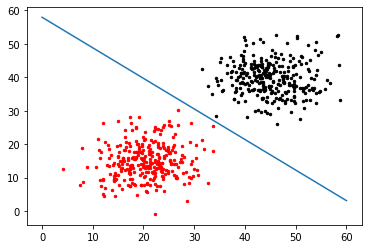

In [176]:
model = Perception()
model.fit_raw_mod(dataset, lr=1)

w:[ 6.06428531 19.42194872], b:-749.0


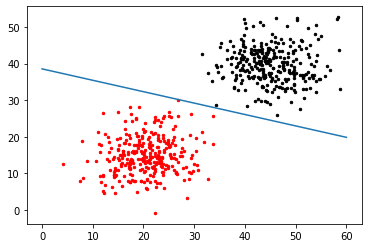

In [177]:
model = Perception()
model.fit_dual_mod(dataset, lr=1)

In [178]:
model.predict(np.array([20,30]))

-1

In [179]:
model.predict(np.array([50,50]))

1